# **Importing Dataset and Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv ("/content/Car details v3.csv")

# **Data Cleaning**

In [ ]:
# Data Cleaning
# Extract numeric values from 'mileage', 'engine', and 'max_power'
data['mileage'] = data['mileage'].str.extract('(\d+.\d+)').astype(float)
data['engine'] = data['engine'].str.extract('(\d+)').astype(float)
data['max_power'] = data['max_power'].str.extract('(\d+.\d+)').astype(float)

In [ ]:
# Drop rows with missing values
data = data.dropna()

In [ ]:
# Create a binary target variable: High Price (above median)
median_price = data['selling_price'].median()
data['high_price'] = (data['selling_price'] > median_price).astype(int)

# **Feature selection**

In [ ]:
# Feature selection
features = ['year', 'km_driven', 'fuel', 'transmission']
X = pd.get_dummies(data[features], drop_first=True)  # Encode categorical variables
y = data['high_price']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

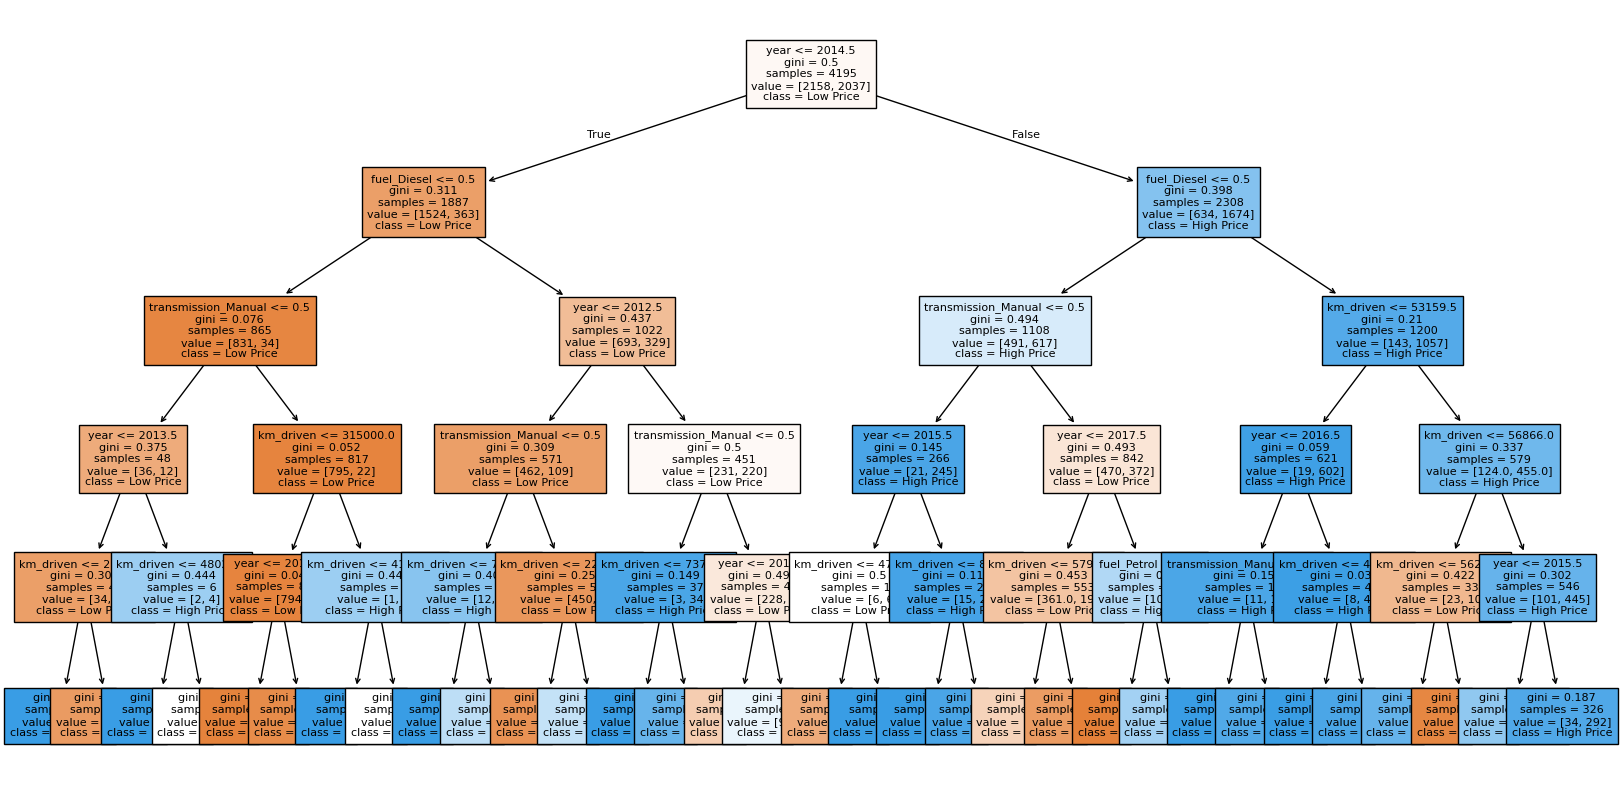

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=["Low Price", "High Price"], filled=True, fontsize=8)
plt.show()

In [ ]:
# Evaluate the model
y_pred = dt_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       864
           1       0.83      0.81      0.82       935

    accuracy                           0.81      1799
   macro avg       0.81      0.81      0.81      1799
weighted avg       0.81      0.81      0.81      1799



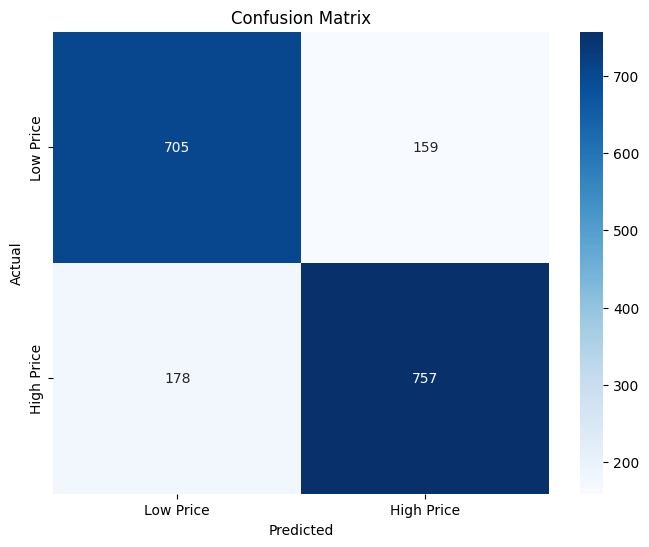

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()